# Import statements

In [1]:
import os
print(os.name)  # Outputs 'posix' for Linux systems

posix


In [2]:
!python --version

Python 3.10.14


In [3]:
!pip show scikit-learn 

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, bigframes, Boruta, category-encoders, cesium, eli5, fastai, hep-ml, imbalanced-learn, librosa, lime, mlxtend, nilearn, pyLDAvis, rgf-python, scikit-learn-intelex, scikit-optimize, scikit-plot, shap, sklearn-pandas, TPOT, tsfresh, woodwork, yellowbrick


In [67]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, QuantileTransformer, FunctionTransformer, KBinsDiscretizer,LabelEncoder
from sklearn.compose import make_column_selector as mcs
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV, HalvingGridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
import lightgbm as lgb
from itertools import combinations

In [5]:
np.random.seed(42)

# Load data

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scikit-learn-1-5-2-py310/scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [7]:
import pandas as pd

# Load the datasets
train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# Check the structure of the data
print(train.head())
print(test.head())

  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  
  last contact date  age          job  

# Data Description

## Input Variables

1. **Last Contact Date**:  
   - Description: Last contact date of the client.  
   - Type: Date.

2. **Age**:  
   - Description: Age of the client.  
   - Type: Numeric.

3. **Job**:  
   - Description: Type of job the client has.  
   - Type: Categorical.  
   - Categories: `"admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"`.

4. **Marital Status**:  
   - Description: Marital status of the client.  
   - Type: Categorical.  
   - Categories: `"married", "divorced", "single"` (*Note*: `"divorced"` includes divorced or widowed).

5. **Education**:  
   - Description: Client's education level.  
   - Type: Categorical.  
   - Categories: `"unknown", "secondary", "primary", "tertiary"`.

6. **Default**:  
   - Description: Indicates if the client has credit in default.  
   - Type: Binary.  
   - Categories: `"yes", "no"`.

7. **Balance**:  
   - Description: Average yearly balance in euros.  
   - Type: Numeric.

8. **Housing Loan**:  
   - Description: Indicates if the client has a housing loan.  
   - Type: Binary.  
   - Categories: `"yes", "no"`.

9. **Personal Loan**:  
   - Description: Indicates if the client has a personal loan.  
   - Type: Binary.  
   - Categories: `"yes", "no"`.

10. **Contact Communication Type**:  
    - Description: Type of communication used for the last contact.  
    - Type: Categorical.  
    - Categories: `"unknown", "telephone", "cellular"`.

11. **Duration**:  
    - Description: Duration of the last contact in seconds.  
    - Type: Numeric.

12. **Campaign Contacts**:  
    - Description: Number of contacts performed during this campaign (includes last contact).  
    - Type: Numeric.

13. **Days Since Previous Contact (`pdays`)**:  
    - Description: Number of days since the client was last contacted from a previous campaign.  
    - Type: Numeric.  
    - Notes: `-1` indicates the client was not previously contacted.

14. **Previous Contacts**:  
    - Description: Number of contacts performed before this campaign for the client.  
    - Type: Numeric.

15. **Previous Campaign Outcome (`poutcome`)**:  
    - Description: Outcome of the previous marketing campaign.  
    - Type: Categorical.  
    - Categories: `"unknown", "other", "failure", "success"`.

---

## Output Variable

16. **Target**:  
    - Description: Indicates whether the client subscribed to a term deposit.  
    - Type: Binary.  
    - Categories: `"yes", "no"`.

# Exploratory Data Analysis

In [8]:
train.shape

(39211, 16)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0


In [11]:
train.describe(include='object').T

,count,unique,top,freq
last contact date,39211,1013,2009-05-15,313
job,38982,11,blue-collar,7776
marital,39211,3,married,22691
education,37744,3,secondary,19584
default,39211,2,no,36954
housing,39211,2,yes,21657
loan,39211,2,no,31820
contact,28875,2,cellular,25030
poutcome,9760,3,failure,4949
target,39211,2,no,33384


In [12]:
train['job'].value_counts()

job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64

In [13]:
train['marital'].value_counts()

marital
married     22691
single      11250
divorced     5270
Name: count, dtype: int64

In [14]:
train['education'].value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

In [15]:
train['default'].value_counts()

default
no     36954
yes     2257
Name: count, dtype: int64

In [16]:
train['housing'].value_counts()

housing
yes    21657
no     17554
Name: count, dtype: int64

In [17]:
train['loan'].value_counts()

loan
no     31820
yes     7391
Name: count, dtype: int64

In [18]:
train['contact'].value_counts()

contact
cellular     25030
telephone     3845
Name: count, dtype: int64

In [19]:
train['poutcome'].value_counts()

poutcome
failure    4949
other      2560
success    2251
Name: count, dtype: int64

In [20]:
train['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

# Data Visualization

Visualizing data...


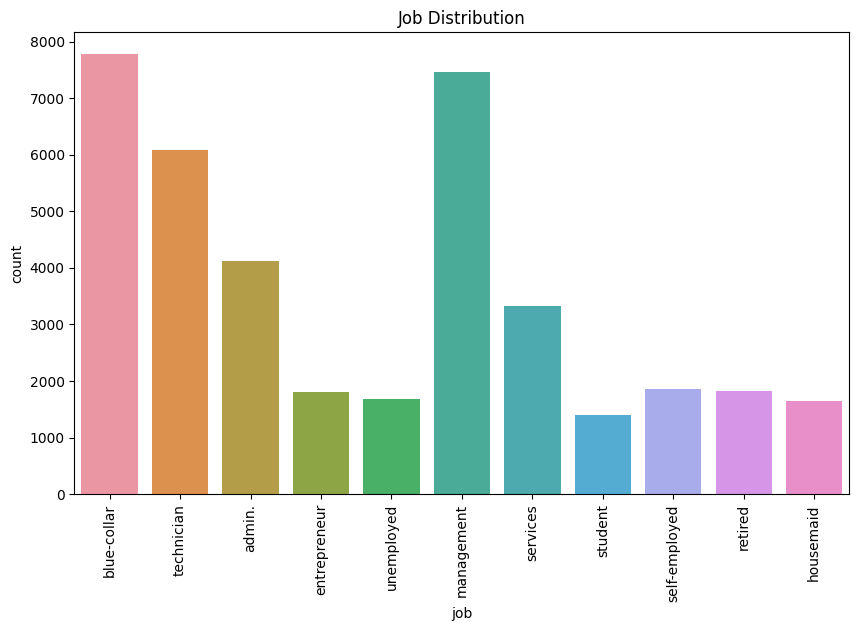

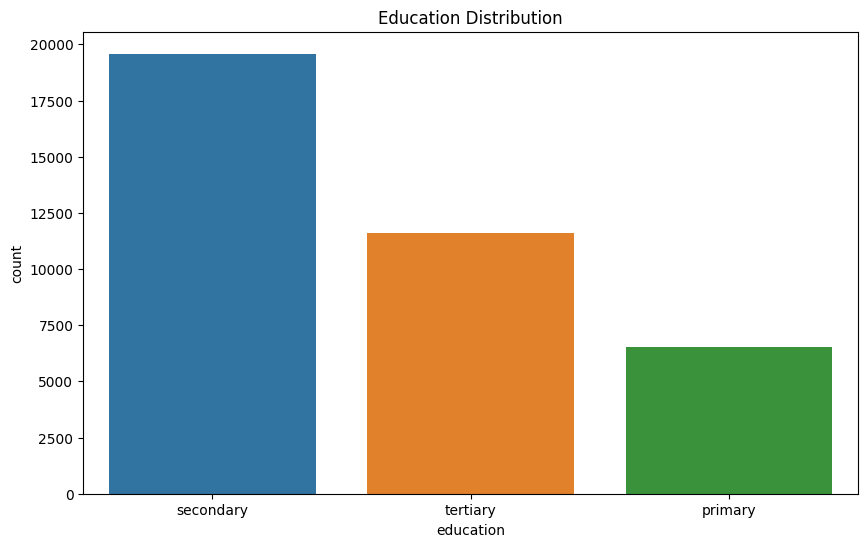

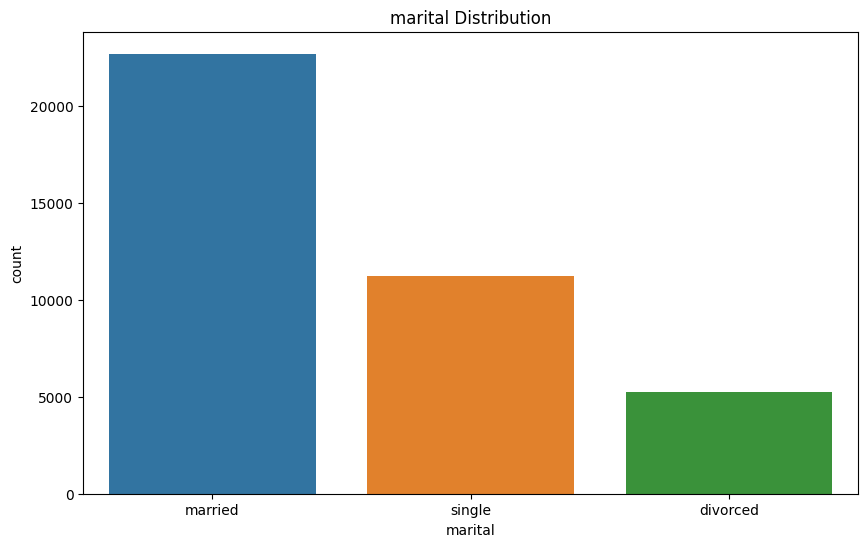

Performing statistical analysis...
Correlation matrix:
               age   balance  duration  campaign     pdays  previous
age       1.000000  0.289150  0.255573  0.269439  0.199507  0.277487
balance   0.289150  1.000000  0.669737  0.674339  0.562097  0.716816
duration  0.255573  0.669737  1.000000  0.630944  0.527020  0.683951
campaign  0.269439  0.674339  0.630944  1.000000  0.519469  0.689211
pdays     0.199507  0.562097  0.527020  0.519469  1.000000  0.586175
previous  0.277487  0.716816  0.683951  0.689211  0.586175  1.000000


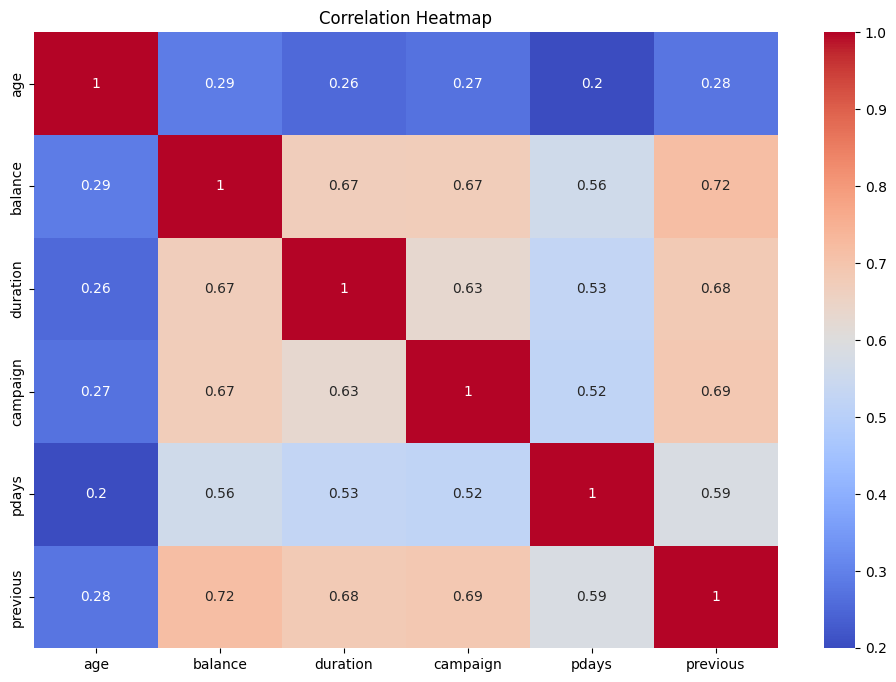

In [21]:
print("Visualizing data...")
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=train)
plt.title('Job Distribution')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=train)
plt.title('Education Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=train)
plt.title('marital Distribution')
plt.show()

# Statistical Analysis
print("Performing statistical analysis...")
print("Correlation matrix:")
correlation_matrix = train.select_dtypes(include=['number']).corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

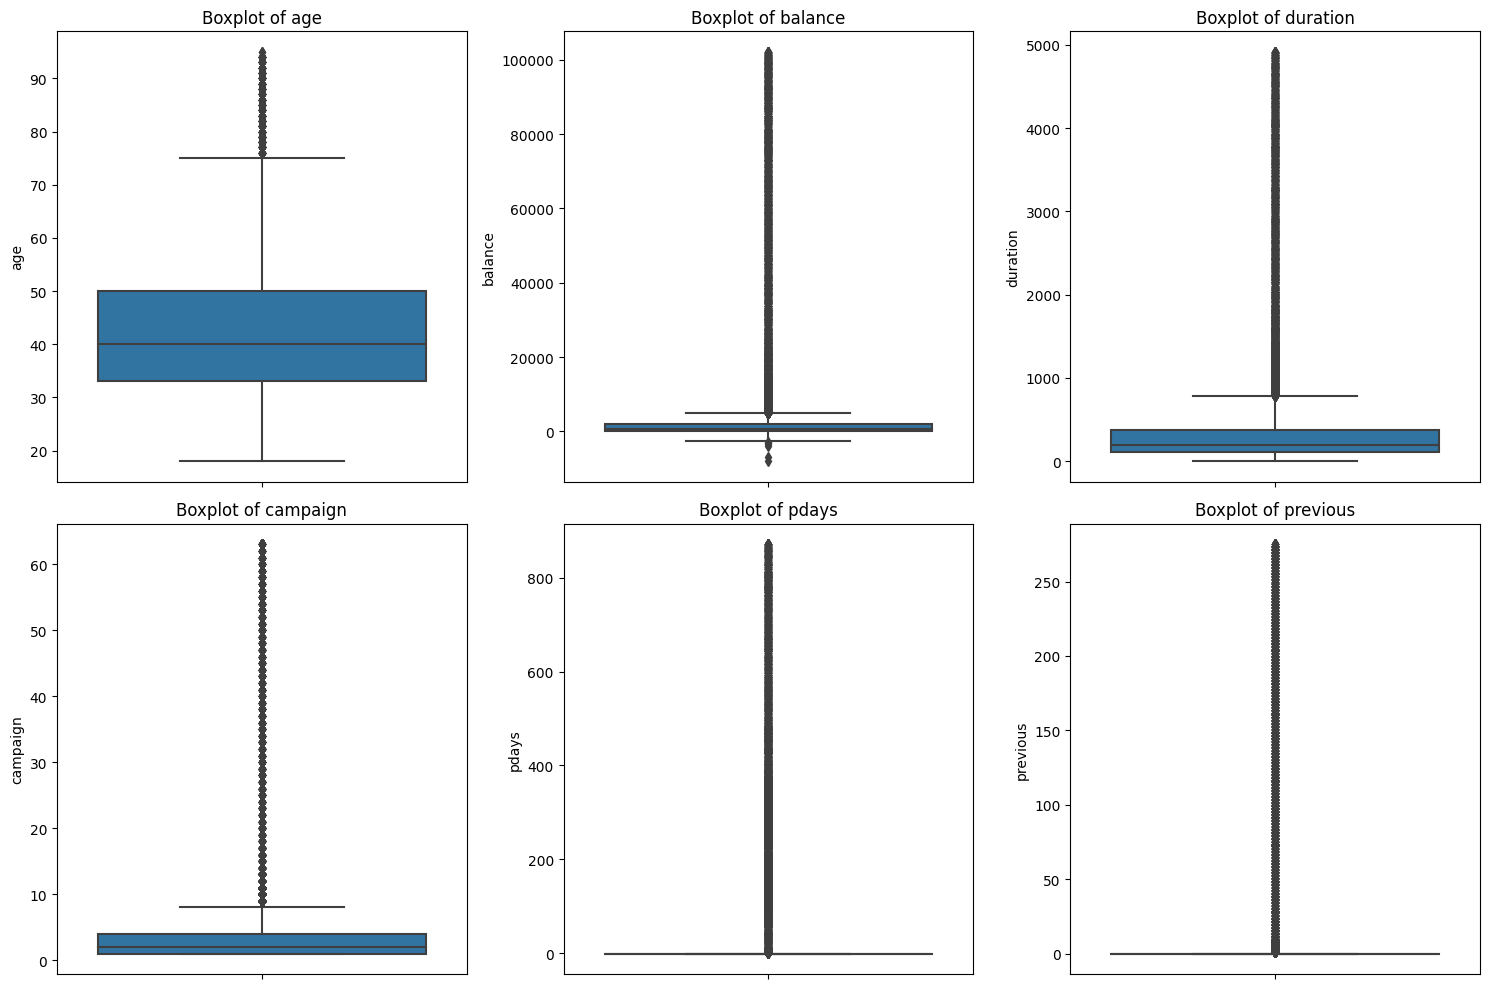

In [22]:
# Draw box plots for columns with int64 dtype
int_columns = train.select_dtypes(include='int64').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(int_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

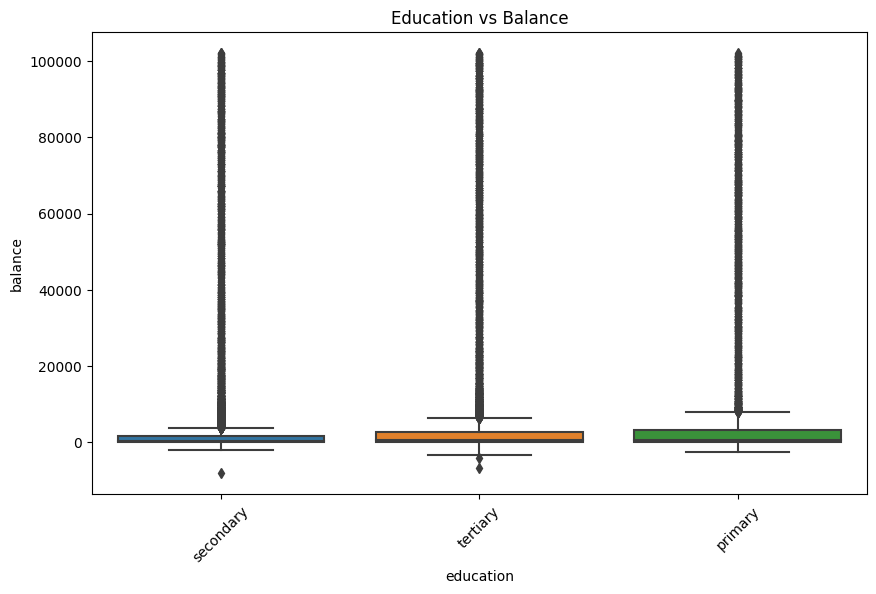

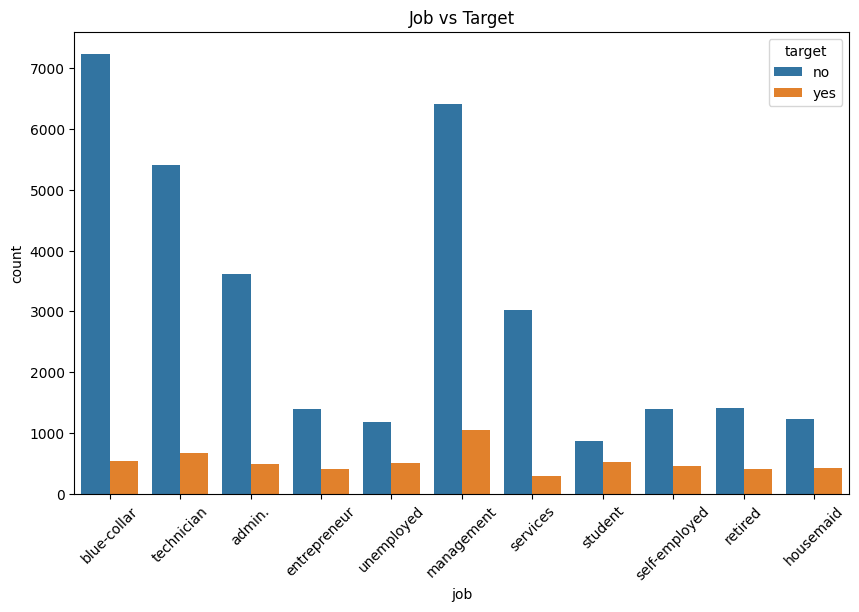

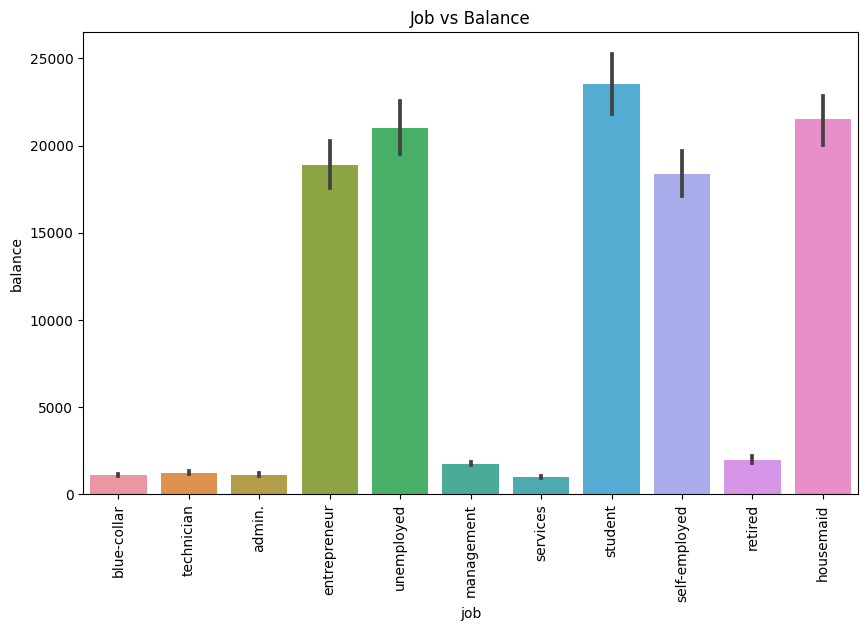

In [23]:
# Boxplot: Education vs Balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='balance', data=train)
plt.xticks(rotation=45)
plt.title('Education vs Balance')
plt.show()

# Countplot: Job vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='target', data=train)
plt.xticks(rotation=45)
plt.title('Job vs Target')
plt.show()

# Scatterplot: Job vs Balance
plt.figure(figsize=(10, 6))
sns.barplot(train, x="job", y="balance");
plt.title('Job vs Balance')
plt.xticks(rotation=90)
plt.show()

# Analyze the impact of Outliers

In [24]:
# from scipy import stats

# threshold_z = 3

# z = np.abs(stats.zscore(train['previous'])) # replace numeric variables and try

# outlier_indices = np.where(z > threshold_z)[0]
# train.iloc[outlier_indices]['target'].value_counts()

**Insights:**
```
The outliers of numeric variables hold significance.

# Preprocessing

In [25]:
# Extract year, month, day, and weekday for train dataset
train['last contact date'] = pd.to_datetime(train['last contact date'])
train['last_contact_year'] = train['last contact date'].dt.year
train['last_contact_month'] = train['last contact date'].dt.month
train['last_contact_day'] = train['last contact date'].dt.day
train['last_contact_weekday'] = train['last contact date'].dt.day_name()
train = train.drop(columns=['last contact date'])

# Visulalization of relationship of last contact date info against target

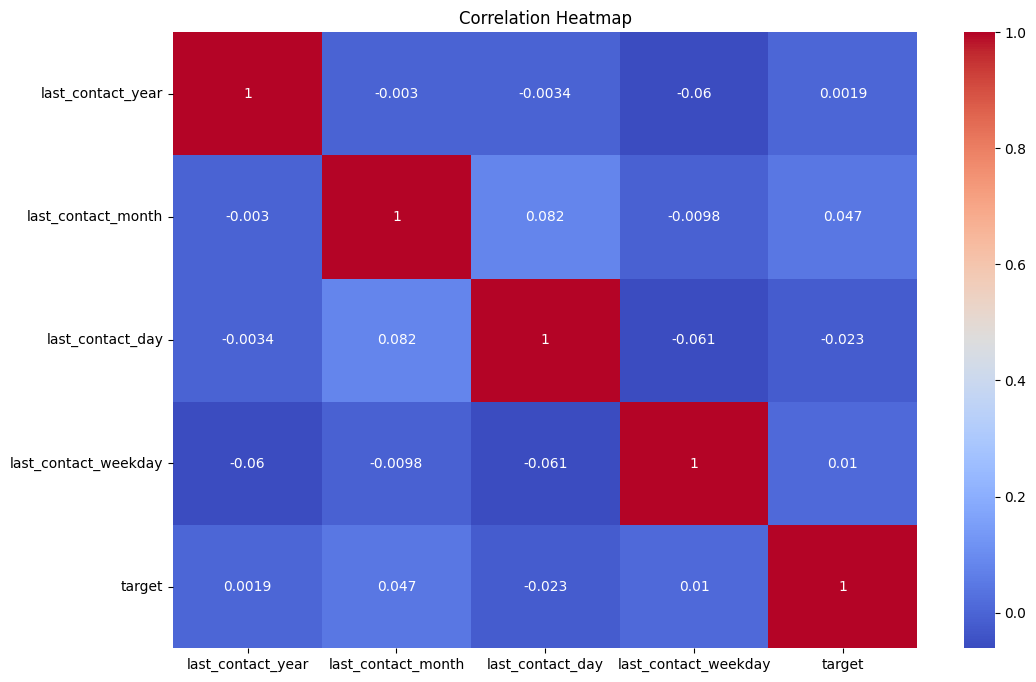

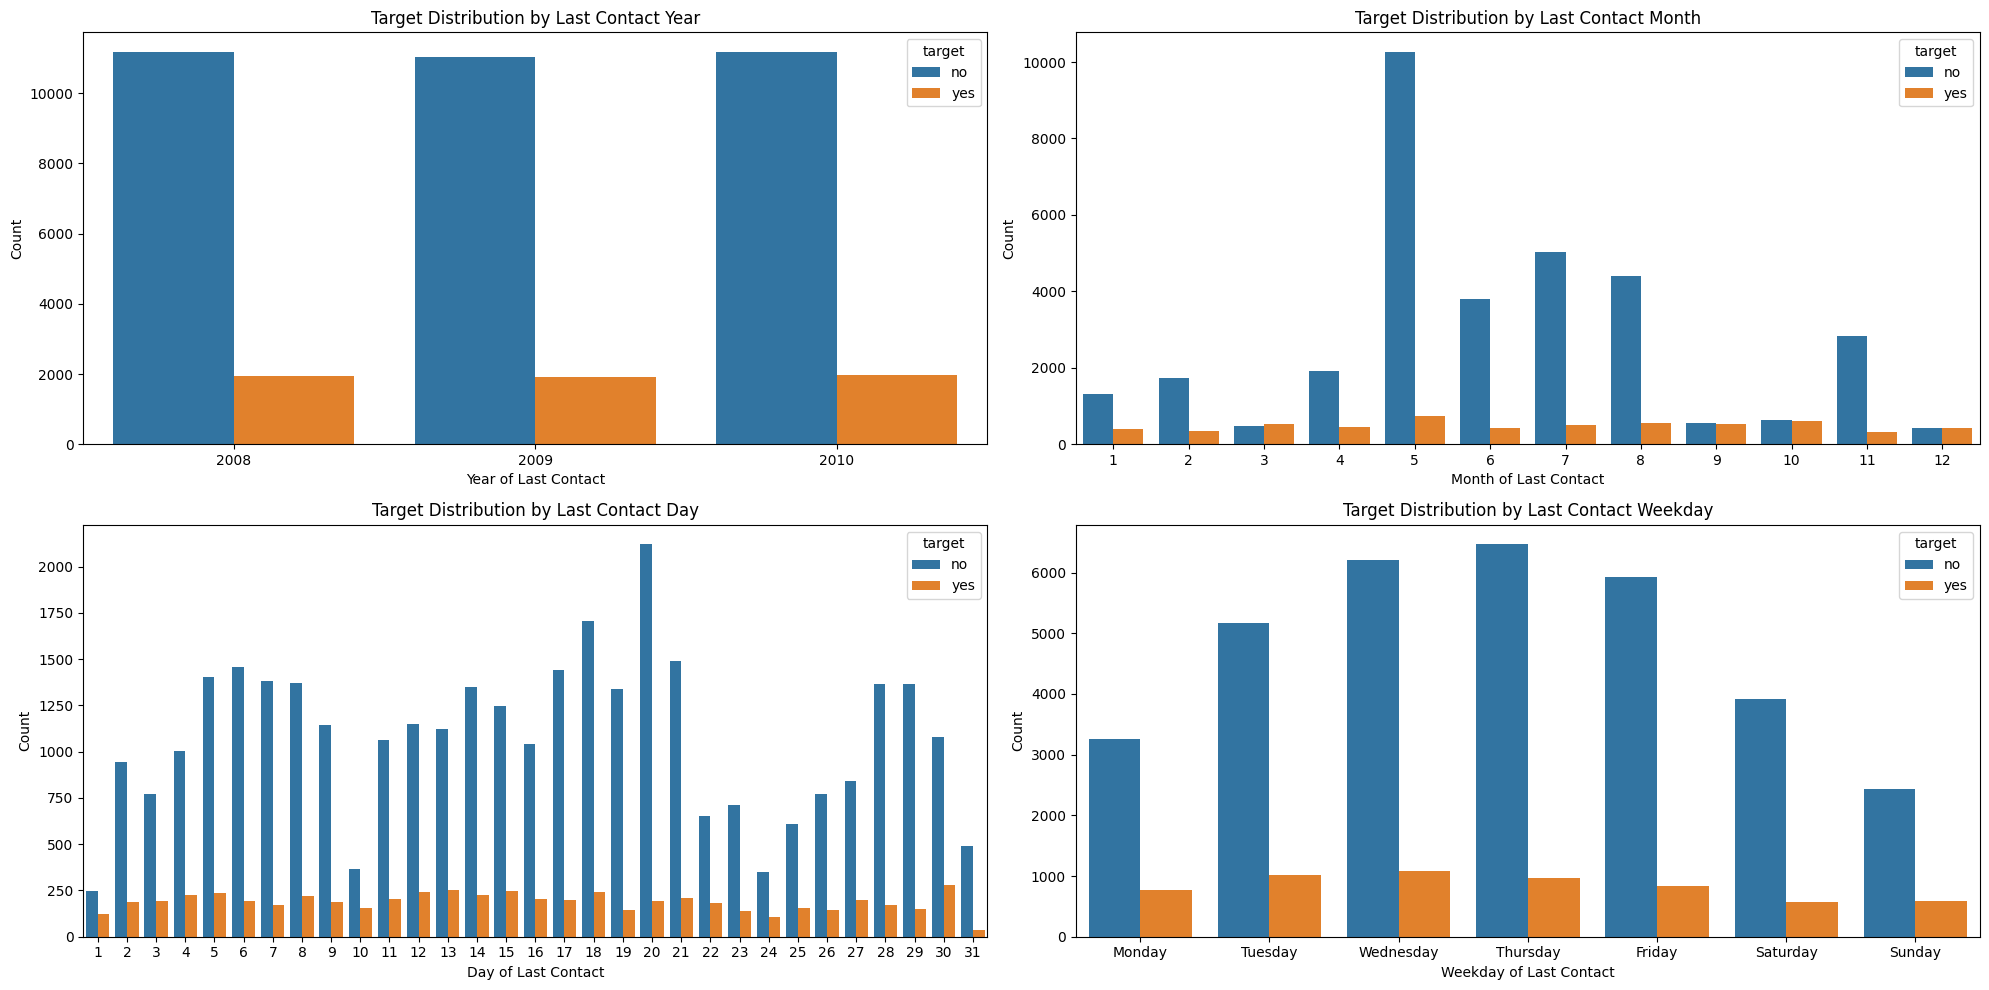

In [26]:
# Statistical Analysis
columns_of_interest = [
    'last_contact_year',
    'last_contact_month',
    'last_contact_day',
    'last_contact_weekday',
    'target'
]
df_subset = train[columns_of_interest]
df_subset.loc[:, 'target'] = df_subset['target'].astype('category').cat.codes
df_subset.loc[:, 'last_contact_weekday'] = df_subset['last_contact_weekday'].astype('category').cat.codes
correlation_matrix = df_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(20, 10))

# Plotting 'last_contact_year' vs. 'target'
plt.subplot(2, 2, 1)
sns.countplot(x='last_contact_year', hue='target', data=train)
plt.title('Target Distribution by Last Contact Year')
plt.xlabel('Year of Last Contact')
plt.ylabel('Count')

# Plotting 'last_contact_month' vs. 'target'
plt.subplot(2, 2, 2)
sns.countplot(x='last_contact_month', hue='target', data=train)
plt.title('Target Distribution by Last Contact Month')
plt.xlabel('Month of Last Contact')
plt.ylabel('Count')

# Plotting 'last_contact_day' vs. 'target'
plt.subplot(2, 2, 3)
sns.countplot(x='last_contact_day', hue='target', data=train)
plt.title('Target Distribution by Last Contact Day')
plt.xlabel('Day of Last Contact')
plt.ylabel('Count')

# Plotting 'last_contact_weekday' vs. 'target'
plt.subplot(2, 2, 4)
sns.countplot(x='last_contact_weekday', hue='target', data=train, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Target Distribution by Last Contact Weekday')
plt.xlabel('Weekday of Last Contact')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Insights:**
```
Year does not have any impact on target variable, whereas others have impact on target variable.

In [27]:
# Define the target column
target_column = 'target'

# Separate the input features (X) and the output target (y)
X_train = train.drop(columns=[target_column])
y_train = train[target_column]  # The target variable
print("Input features (X_train) and target (y_train) separated.")
print("X_train sample:")
print(X_train.head())
print("y_train sample:")
print(y_train.head())

Input features (X_train) and target (y_train) separated.
X_train sample:
   age           job  marital  education default  balance housing loan  \
0   26   blue-collar  married  secondary      no      647     yes   no   
1   52    technician  married  secondary      no      553     yes   no   
2   44   blue-collar  married  secondary      no     1397      no   no   
3   33        admin.  married  secondary      no      394     yes   no   
4   31  entrepreneur   single   tertiary      no      137      no   no   

     contact  duration  campaign  pdays  previous poutcome  last_contact_year  \
0   cellular       357         2    331         1    other               2009   
1  telephone       160         1     -1         0      NaN               2009   
2   cellular       326         1     -1         0      NaN               2010   
3  telephone       104         3     -1         0      NaN               2009   
4   cellular       445         2     -1         0      NaN               2008

In [28]:
X_train.shape

(39211, 18)

# Train Validation Sets Split

In [29]:
# Split the data into training and validation sets
print("Splitting the data into training and validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Data split complete. Training and validation set samples:")
print("X_train sample:")
print(X_train.head())
print("X_val sample:")
print(X_val.head())
print("y_train sample:")
print(y_train.head())
print("y_val sample:")
print(y_val.head())

Splitting the data into training and validation sets...
Data split complete. Training and validation set samples:
X_train sample:
       age          job  marital  education default  balance housing loan  \
13800   46       admin.   single        NaN      no      306     yes   no   
32874   43  blue-collar  married  secondary     yes      128     yes   no   
9072    32      student   single  secondary      no        0      no   no   
26803   47     services  married  secondary      no        5      no   no   
35504   45       admin.  married  secondary      no       43      no   no   

        contact  duration  campaign  pdays  previous poutcome  \
13800  cellular       289         5     -1         0      NaN   
32874  cellular        71         1     -1         0      NaN   
9072   cellular       206         1     -1         0      NaN   
26803  cellular       169         1     -1         0      NaN   
35504  cellular       114         4     -1         0      NaN   

       last_cont

# Feature Engineering

In [30]:
num_col_sel = mcs(dtype_exclude="object")
# cat_col_sel = mcs(dtype_include="object")

# One-Hot Encoding for nominal columns
one_hot_cols = ['default', 'housing', 'loan','job', 'marital', 'contact','education', 'poutcome','last_contact_weekday']


onehot_pipe = Pipeline([('onehot', OneHotEncoder(drop='if_binary',handle_unknown='ignore'))])
num_pipe = Pipeline([('quantile', QuantileTransformer(output_distribution='normal', random_state=42))])

# Define the feature engineering function
def feature_engineering(df):
    # Impute missing values in the 'poutcome' column
    imputer = SimpleImputer(strategy='constant', fill_value='unknown')
    # Reshape to 2D before fitting
    df['job'] = imputer.fit_transform(df[['job']]).ravel()
    df['education'] = imputer.fit_transform(df[['education']]).ravel()
    df['contact'] = imputer.fit_transform(df[['contact']]).ravel()
    df['poutcome'] = imputer.fit_transform(df[['poutcome']]).ravel()
    return df

# Wrap the feature engineering function in a FunctionTransformer
feature_engineering_transformer = FunctionTransformer(feature_engineering)

encode = ColumnTransformer(
    [
      ('num_pipe', num_pipe, num_col_sel),
      ('onehot_pipe', onehot_pipe, one_hot_cols)
    ],
    remainder='passthrough'
)

# Define the complete pipeline
encode_scale = Pipeline(steps=[
    ('feature_engineering_transformer', feature_engineering_transformer),
    ('encode', encode)
])

In [31]:
encode_scale.fit_transform(X_train)[0].shape

(45,)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


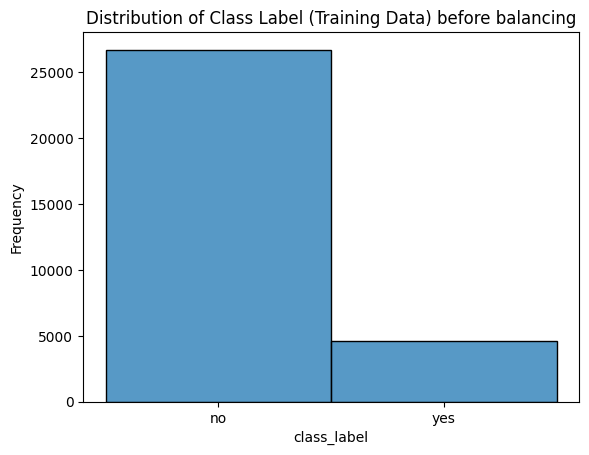

In [32]:
import seaborn as sns
plt = sns.histplot(y_train);
plt.set(xlabel='class_label', ylabel="Frequency", title="Distribution of Class Label (Training Data) before balancing");

# Class Balancing

In [33]:
encode_scale.fit(X_train, y_train)
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_val_encoded = target_encoder.transform(y_val)
X_train_encoded = encode_scale.transform(X_train)
X_val_encoded = encode_scale.transform(X_val)
# sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
# Initialize the RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=42)
# smote_tomek = SMOTETomek(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

X_train_undr, y_train_undr = undersampler.fit_resample(X_train_encoded, y_train_encoded)
X_train_ovr, y_train_ovr = ros.fit_resample(X_train_encoded, y_train_encoded)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


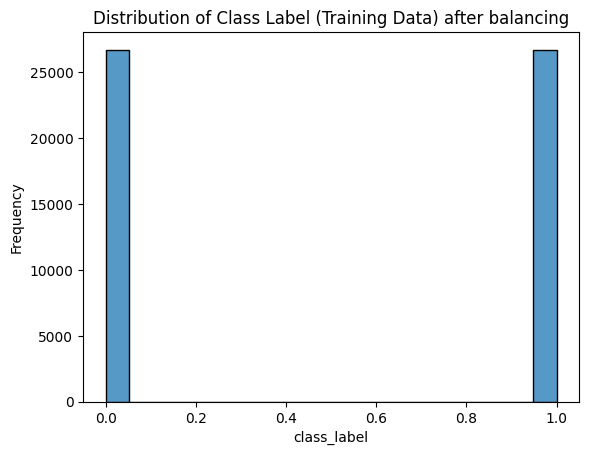

In [34]:
import seaborn as sns
plt = sns.histplot(y_train_ovr);
plt.set(xlabel='class_label', ylabel="Frequency", title="Distribution of Class Label (Training Data) after balancing");

# Model Report Function

In [35]:
def model_report(model, X_train, y_train, X_val, Y_val):
    print("Classification Report on the Training Set")
    y_train_pred = model.predict(X_train)
    print(classification_report(y_train, y_train_pred))
    print("Confusion Matrix on the Training Set")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification Report on the Validation Set")
    y_val_pred = model.predict(X_val)
    print(classification_report(Y_val, y_val_pred))
    print("Confusion Matrix on the Validation Set")
    print(confusion_matrix(y_val_encoded, y_val_pred))

# Stratified K-Fold

In [68]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression

In [36]:
# logistic_model = Pipeline(
#     steps=[
#         ('preprocessor', encode_scale),
#         # ("selector", SelectKBest(score_func=chi2, k=3)),
#         ("classifier", LogisticRegression(class_weight='balanced', max_iter=500))
#     ]
# )
# logistic_model.fit(X_train, y_train_encoded)
# model_report(logistic_model, X_train, y_train_encoded, X_val, y_val_encoded)

**Result**
```
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     26739
           1       0.41      0.82      0.55      4629

    accuracy                           0.80     31368
   macro avg       0.69      0.81      0.71     31368
weighted avg       0.88      0.80      0.83     31368

Confusion Matrix on the Training Set
[[21357  5382]
 [  842  3787]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6645
           1       0.42      0.81      0.55      1198

    accuracy                           0.80      7843
   macro avg       0.69      0.80      0.71      7843
weighted avg       0.88      0.80      0.82      7843

Confusion Matrix on the Validation Set
[[5317 1328]
 [ 231  967]]

# Logistic Regression with Hyperparameter Tuning

In [37]:
# # Define the parameter distribution for RandomizedSearchCV
# param_dist_logistic = {
#     'classifier__penalty': ['l2', 'l1'],  # Regularization types
#     'classifier__C': np.logspace(-3, 3, 7),  # Regularization strength (log-scale)
#     'classifier__solver': ['saga'],  # Optimization solvers
# }

# # Create HalvingRandomSearchCV instance
# random_search_logistic = HalvingRandomSearchCV(
#     estimator=logistic_model,
#     param_distributions=param_dist_logistic,
#     factor=3,  # Number of configurations retained per iteration
#     min_resources=10,  # Start with 10 iterations
#     max_resources=5000,  # Allow up to 1000 iterations
#     resource='classifier__max_iter',  # Resource to allocate incrementally
#     random_state=42,
#     n_jobs=-1,
#     scoring='f1'
# )

# # Fit the model with training data
# random_search_logistic.fit(X_train, y_train_encoded)
# model_report(random_search_logistic, X_train, y_train_encoded, X_val, y_val_encoded)


**Result**
```
Best parameters (Logistic Regression): {'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__C': 0.01, 'classifier__max_iter': 90}
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     26739
           1       0.41      0.82      0.55      4629

    accuracy                           0.80     31368
   macro avg       0.69      0.81      0.71     31368
weighted avg       0.88      0.80      0.83     31368

Confusion Matrix on the Training Set
[[21371  5368]
 [  833  3796]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6645
           1       0.42      0.81      0.55      1198

    accuracy                           0.80      7843
   macro avg       0.69      0.80      0.71      7843
weighted avg       0.88      0.80      0.82      7843

Confusion Matrix on the Validation Set
[[5312 1333]
 [ 228  970]]

# SGD Classifier

In [38]:
sgd_model = Pipeline(
    steps=[
        ("classifier", SGDClassifier(loss='log_loss'))
    ]
)
# # Define the parameter distribution for RandomizedSearchCV
# param_dist_sgd = {
#     # 'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge'],  # Different loss functions
#     'classifier__penalty': ['l2', 'l1', 'elasticnet'],  # Regularization types
#     'classifier__alpha': np.logspace(-5, -1, 5),  # Regularization strength (log-scale)
#     'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
#     'classifier__eta0': [0.001, 0.01, 0.1],  # Initial learning rate
# }

# # Set up HalvingRandomSearchCV for SGDClassifier
# random_search_sgd = HalvingRandomSearchCV(
#     estimator=sgd_model,
#     param_distributions=param_dist_sgd,
#     factor=3,  # Number of configurations retained per iteration
#     min_resources=1000,  # Start with 10 iterations
#     max_resources=5000,  # Allow up to 1000 iterations
#     resource='classifier__max_iter',  # Resource to allocate incrementally
#     random_state=42,
#     n_jobs=-1,
#     verbose=1,
#     scoring='f1'
# )

# # Fit the model with training data
# random_search_sgd.fit(X_train_encoded, y_train_encoded)

# # Best parameters for SGDClassifier
# print(f"Best parameters (SGD Classifier): {random_search_sgd.best_params_}")
# model_report(random_search_sgd.best_estimator_, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Best parameters (SGD Classifier): {'classifier__penalty': 'l2', 'classifier__learning_rate': 'invscaling', 'classifier__eta0': 0.001, 'classifier__alpha': 0.0001, 'classifier__max_iter': 3000}
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     26739
           1       0.50      0.35      0.41      4629

    accuracy                           0.85     31368
   macro avg       0.70      0.65      0.66     31368
weighted avg       0.84      0.85      0.84     31368

Confusion Matrix on the Training Set
[[25145  1594]
 [ 3008  1621]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6645
           1       0.50      0.34      0.41      1198

    accuracy                           0.85      7843
   macro avg       0.70      0.64      0.66      7843
weighted avg       0.83      0.85      0.84      7843

Confusion Matrix on the Validation Set
[[6241  404]
 [ 787  411]]

# Feature Selection

In [39]:
feature_selector_pipeline = Pipeline(
    steps=[
        ('scaler', MinMaxScaler()), # Using this since X can not be negative
        ("feature_selector", SelectKBest(score_func=chi2, k=40))
    ]
)
# Feature Selection: SelectKBest with chi2
X_train_selected = feature_selector_pipeline.fit_transform(X_train_encoded, y_train_encoded)
X_val_selected = feature_selector_pipeline.transform(X_val_encoded)
# logistic_model = Pipeline(
#     steps=[
#         # ('preprocessor', encode_scale),
#         # ("selector", SelectKBest(score_func=chi2, k=3)),
#         ("classifier", LogisticRegression(class_weight='balanced', max_iter=500))
#     ]
# )
# logistic_model.fit(X_train_selected, y_train_encoded)
# model_report(logistic_model, X_train_selected, y_train_encoded, X_val_selected, y_val_encoded)
# rf_model.fit(X_train_selected, y_train_encoded)
# model_report(rf_model, X_train_selected, y_train_encoded, X_val_selected, y_val_encoded)

**Insights:**

1. The dataset has **45 features**.
2. **Logistic Regression**: Reducing the feature set to **20** (i.e., `K=20`) yields results equivalent to using all features.
3. **Random Forest Classifier**: Using **40 features** (i.e., `K=40`) gives similar performance as using the entire feature set.
4. Given the **small feature size** (45), feature selection **is not crucial** for this dataset.
5. Feature selection is typically beneficial when the feature size is **significantly larger**, e.g., **200+ features**.

# Guassian Naive Bayes

In [40]:
# # Naive Bayes Classifier
# # Step 1: Preprocess data using MinMaxScaler to ensure non-negative values
# scaler = StandardScaler()

# # Step 2: Create a pipeline to preprocess and fit the model
# nb_pipeline = Pipeline(steps=[
#     ('scaler', scaler),
#     ('classifier', GaussianNB()) # GaussianNB
# ])
# nb_pipeline.fit(X_train_encoded, y_train_encoded)
# model_report(nb_pipeline, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     26739
           1       0.39      0.57      0.46      4629

    accuracy                           0.81     31368
   macro avg       0.66      0.71      0.67     31368
weighted avg       0.84      0.81      0.82     31368

Confusion Matrix on the Training Set
[[22639  4100]
 [ 1993  2636]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      6645
           1       0.38      0.54      0.45      1198

    accuracy                           0.80      7843
   macro avg       0.65      0.69      0.66      7843
weighted avg       0.83      0.80      0.81      7843

Confusion Matrix on the Validation Set
[[5593 1052]
 [ 550  648]]

# Complement Naive Bayes

In [41]:
# # Naive Bayes Classifier
# # Step 1: Preprocess data using MinMaxScaler to ensure non-negative values
# scaler = MinMaxScaler()

# # Step 2: Create a pipeline to preprocess and fit the model
# nb_pipeline = Pipeline(steps=[
#     ('scaler', scaler), # X should non-negative for ComplementNB
#     ('classifier', ComplementNB())
# ])
# nb_pipeline.fit(X_train_encoded, y_train_encoded)
# model_report(nb_pipeline, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)


**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     26739
           1       0.31      0.61      0.41      4629

    accuracy                           0.74     31368
   macro avg       0.62      0.69      0.62     31368
weighted avg       0.83      0.74      0.77     31368

Confusion Matrix on the Training Set
[[20538  6201]
 [ 1818  2811]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      6645
           1       0.31      0.59      0.40      1198

    accuracy                           0.74      7843
   macro avg       0.61      0.67      0.62      7843
weighted avg       0.82      0.74      0.77      7843

Confusion Matrix on the Validation Set
[[5072 1573]
 [ 496  702]]

# K-Nearest Neighbors Classifier

In [42]:
# # K-Nearest Neighbors Classifier
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_encoded, y_train_encoded)
# model_report(knn_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     26739
           1       0.78      0.57      0.66      4629

    accuracy                           0.91     31368
   macro avg       0.86      0.77      0.80     31368
weighted avg       0.91      0.91      0.91     31368

Confusion Matrix on the Training Set
[[26002   737]
 [ 1995  2634]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6645
           1       0.54      0.35      0.42      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.65      0.67      7843
weighted avg       0.84      0.86      0.84      7843

Confusion Matrix on the Validation Set
[[6295  350]
 [ 784  414]6091  554]
 [ 743  455]]

# K-Nearest Neighbors Classifier (Hyperparameter Tuning)

In [43]:
# # Define the parameter grid for hyperparameter tuning
# param_dist = {
#     'n_neighbors': np.arange(1, 30),  # Trying different values for the number of neighbors
#     'weights': ['uniform', 'distance'],  # Different weighting strategies
#     'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
# }

# # Apply Randomized Search Cross Validation
# random_search = RandomizedSearchCV(
#     estimator=knn_model,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of different parameter combinations to try
#     scoring='accuracy',  # Define the scoring metric (can be changed as needed)
#     cv=3,  # Number of cross-validation folds
#     random_state=42,  # Set random state for reproducibility
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Verbosity level
# )

# # Fit the model with training data
# random_search.fit(X_train_encoded, y_train_encoded)

# # Output the best parameters found by Halving Random Search
# print("Best parameters found: ", random_search.best_params_)
# print("Best score achieved: ", random_search.best_score_)
# model_report(random_search.best_estimator_, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Best parameters found:  {'weights': 'distance', 'n_neighbors': 22, 'metric': 'manhattan'}
Best score achieved:  0.86078168834481
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26739
           1       1.00      1.00      1.00      4629

    accuracy                           1.00     31368
   macro avg       1.00      1.00      1.00     31368
weighted avg       1.00      1.00      1.00     31368

Confusion Matrix on the Training Set
[[26739     0]
 [    0  4629]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6645
           1       0.56      0.25      0.35      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.61      0.63      7843
weighted avg       0.83      0.86      0.83      7843

Confusion Matrix on the Validation Set
[[6407  238]
 [ 898  300]]

# Support Vector Machine Classifier

In [44]:
# # Support Vector Machine Classifier
# svm_model = SVC(kernel='rbf', C=1, gamma='scale')
# svm_model.fit(X_train_encoded, y_train_encoded)
# model_report(svm_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     26739
           1       0.62      0.26      0.36      4629

    accuracy                           0.87     31368
   macro avg       0.75      0.61      0.64     31368
weighted avg       0.84      0.87      0.84     31368

Confusion Matrix on the Training Set
[[26017   722]
 [ 3446  1183]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6645
           1       0.59      0.22      0.32      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843

Confusion Matrix on the Validation Set
[[6455  190]
 [ 930  268]]

# Random Forest Classifier

In [45]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)
# rf_model.fit(X_train_encoded, y_train_encoded)
# model_report(rf_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

```
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     26739
           1       0.64      0.97      0.77      4629

    accuracy                           0.92     31368
   macro avg       0.82      0.94      0.86     31368
weighted avg       0.94      0.92      0.92     31368

Confusion Matrix on the Training Set
[[24258  2481]
 [  141  4488]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6645
           1       0.53      0.76      0.63      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.82      0.77      7843
weighted avg       0.89      0.86      0.87      7843

Confusion Matrix on the Validation Set
[[5840  805]
 [ 283  915]]5736  909]
 [ 274  924]]

# Random Forest Classifier With Hypermeter Tuning

In [70]:
# # Define the hyperparameter distributions
# param_distributions = {
#     'min_samples_split': randint(2, 20),  # Random minimum samples for split
#     'min_samples_leaf': randint(1, 10),  # Random minimum samples per leaf
#     'class_weight': ['balanced', {0: 5, 1: 1}],  # Balanced or custom class weights
# }

# # Initialize the RandomForestClassifier
# rf_model = RandomForestClassifier(random_state=42)

# # Set min_resources and max_resources for 10 iterations with factor=2
# max_resources = 512  # Maximum number of trees
# min_resources = 10  

# # Define HalvingRandomSearchCV
# halving_cv = HalvingRandomSearchCV(
#     estimator=rf_model,
#     param_distributions=param_distributions,
#     scoring='f1_macro',  # Optimize for macro-average F1 score
#     factor=2,  # Resource multiplier
#     resource='n_estimators',  # Use number of trees as the resource
#     max_resources=max_resources,  # Maximum number of trees
#     min_resources=min_resources,  # Minimum number of trees
#     cv=cv,  # 3-fold cross-validation
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the model using HalvingRandomSearchCV
# halving_cv.fit(X_train_encoded, y_train_encoded)

# # Best parameters and score
# print("Best Parameters:", halving_cv.best_params_)
# print("Best Score:", halving_cv.best_score_)

# # Train the best model on the training data
# best_rf_model = halving_cv.best_estimator_
# model_report(best_rf_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 10
max_resources_: 512
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 51
n_resources: 10
Fitting 5 folds for each of 51 candidates, totalling 255 fits
----------
iter: 1
n_candidates: 26
n_resources: 20
Fitting 5 folds for each of 26 candidates, totalling 130 fits
----------
iter: 2
n_candidates: 13
n_resources: 40
Fitting 5 folds for each of 13 candidates, totalling 65 fits
----------
iter: 3
n_candidates: 7
n_resources: 80
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 160
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'class_weight': 'balanced', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 320}
Best Score: 0.770645459158283
Classification Report on the Traini

**Result**
```
Best Parameters: {'class_weight': 'balanced', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 320}
Best Score: 0.770645459158283
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     26739
           1       0.64      0.97      0.77      4629

    accuracy                           0.92     31368
   macro avg       0.82      0.94      0.86     31368
weighted avg       0.94      0.92      0.92     31368

Confusion Matrix on the Training Set
[[24233  2506]
 [  145  4484]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6645
           1       0.53      0.76      0.63      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.82      0.77      7843
weighted avg       0.89      0.86      0.87      7843

Confusion Matrix on the Validation Set
[[5841  804]
 [ 282  916]]]]
[[5756  889]
 [ 284  914]]

# Random Forest Classifier (Best Params)

In [47]:
# # Best Parameters: {'class_weight': 'balanced', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 512}
# rf_best_model = RandomForestClassifier(n_estimators=512, class_weight='balanced', min_samples_split=12, min_samples_leaf=4)
# rf_best_model.fit(X_train_encoded, y_train_encoded)
# model_report(rf_best_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

# Bagging Classifier

In [48]:
base_tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_tree, n_estimators=100, max_samples=0.8, random_state=42)

# # Used oversampling training set since class imbalancing is not supported by bagging classifier
# bagging_model.fit(X_train_ovr, y_train_ovr)
# model_report(bagging_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     26739
           1       0.71      0.99      0.83      4629

    accuracy                           0.94     31368
   macro avg       0.86      0.96      0.90     31368
weighted avg       0.96      0.94      0.94     31368

Confusion Matrix on the Training Set
[[24899  1840]
 [   41  4588]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      6645
           1       0.51      0.81      0.63      1198

    accuracy                           0.85      7843
   macro avg       0.74      0.83      0.77      7843
weighted avg       0.89      0.85      0.87      7843

Confusion Matrix on the Validation Set
[[5726  919]
 [ 232  966]]5740  905]
 [ 312  886]]

# Bagging Classifier (Hypermeter Tuning)

In [71]:
# # Define the base learners
# base_tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
# base_lr = LogisticRegression(random_state=42, solver='saga', class_weight='balanced', max_iter=90, C=0.01, penalty='l2')

# # Bagging Classifier
# bagging_model = BaggingClassifier(random_state=42)

# # Define hyperparameter distributions
# param_distributions = {
#     'estimator': [base_tree, base_lr],
#     'max_samples': uniform(0.5, 0.5),       # Fraction of samples [0.5, 1.0]
#     'max_features': uniform(0.5, 0.5),      # Fraction of features [0.5, 1.0]
#     'bootstrap_features': [True, False],    # Whether to use bootstrap sampling for features
#     'bootstrap': [True, False],             # Whether to use bootstrap sampling for samples
# }

# # Halving Random Search
# halving_cv = HalvingRandomSearchCV(
#     estimator=bagging_model,
#     param_distributions=param_distributions,
#     scoring='f1_macro',  # Optimize for macro-average F1 score
#     resource='n_estimators',  # Use n_estimators as the resource
#     max_resources=100,  # Maximum number of estimators
#     min_resources=10,  # Minimum number of estimators
#     factor=2,  # Halve the candidates at each iteration
#     cv=cv,  # 3-fold cross-validation
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit HalvingRandomSearchCV
# halving_cv.fit(X_train_ovr, y_train_ovr)

# # Best parameters and score
# print("Best Parameters:", halving_cv.best_params_)
# print("Best Score:", halving_cv.best_score_)

# # Get the best model
# best_bagging_model = halving_cv.best_estimator_
# model_report(best_bagging_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 100
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 10
n_resources: 10
Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

**Result**
```
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'estimator': DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10), 'max_features': 0.9299702033681603, 'max_samples': 0.8401537692938899, 'n_estimators': 80}
Best Score: 0.9479635773130658

Classification Report on the Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26739
           1       0.97      1.00      0.99      4629

    accuracy                           1.00     31368
   macro avg       0.99      1.00      0.99     31368
weighted avg       1.00      1.00      1.00     31368

Confusion Matrix on the Training Set
[[26620   119]
 [   17  4612]]

Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6645
           1       0.56      0.62      0.59      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.77      0.76      7843
weighted avg       0.87      0.87      0.87      7843

Confusion Matrix on the Validation Set
[[6057  588]
 [ 451  747]]
[[6039  606]
 [ 503  695]]

# Balanced Bagging Classifier

In [50]:
# base_tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)

# # Bagging Classifier
# bal_bagging_model = BalancedBaggingClassifier(estimator=base_tree, n_estimators=100, max_samples=0.8)

# # Used oversampling training set since class imbalancing is not supported by bagging classifier
# bal_bagging_model.fit(X_train_encoded, y_train_encoded)
# model_report(bal_bagging_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     26739
           1       0.51      0.96      0.66      4629

    accuracy                           0.86     31368
   macro avg       0.75      0.90      0.79     31368
weighted avg       0.92      0.86      0.87     31368

Confusion Matrix on the Training Set
[[22399  4340]
 [  191  4438]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      6645
           1       0.48      0.89      0.62      1198

    accuracy                           0.84      7843
   macro avg       0.73      0.86      0.76      7843
weighted avg       0.90      0.84      0.85      7843

Confusion Matrix on the Validation Set
[[5494 1151]
 [ 132 1066]]

# Gradient Boosting

In [51]:
# # Create Gradient Boosting model
# boosting_model = GradientBoostingClassifier(
#     n_estimators=100,  # Number of boosting stages
#     learning_rate=0.1,  # Step size
#     max_depth=3,  # Maximum depth of individual estimators
#     random_state=42
# )

# boosting_pipeline = Pipeline(
#     steps=[
#         # ('preprocessor', encode_scale),
#         ("boosting_model", boosting_model)
#     ]
# )

# # Train the model
# boosting_pipeline.fit(X_train_encoded, y_train_encoded)

# model_report(boosting_pipeline, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)


**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     26739
           1       0.65      0.47      0.54      4629

    accuracy                           0.88     31368
   macro avg       0.78      0.71      0.74     31368
weighted avg       0.87      0.88      0.88     31368

Confusion Matrix on the Training Set
[[25570  1169]
 [ 2475  2154]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6645
           1       0.59      0.41      0.48      1198

    accuracy                           0.87      7843
   macro avg       0.74      0.68      0.70      7843
weighted avg       0.85      0.87      0.86      7843

Confusion Matrix on the Validation Set
[[6299  346]
 [ 709  489]]

# Gradient Boosting (Hyperparameter Tuning)

In [52]:
# # Define the parameter grid to search over
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'max_depth': [2, 3, 4, 5, 6],
#     'subsample': [0.6, 0.8, 1.0],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Set up HalvingRandomSearchCV
# halving_random_search = HalvingRandomSearchCV(
#     estimator=boosting_model,
#     param_distributions=param_grid,
#     factor=3,  # Reduction factor at each iteration (how aggressively to downsample)
#     scoring='f1_macro',  # Optimize for macro-average F1 score
#     resource='n_estimators',  # Use n_estimators as the resource
#     max_resources=400,  # Maximum number of estimators
#     min_resources=50,  # Minimum number of estimators
#     cv=3,  # Number of folds for cross-validation
#     random_state=42,
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Set verbosity level to get updates during the process
# )

# # Fit the model using HalvingRandomSearchCV
# halving_random_search.fit(X_train_encoded, y_train_encoded)

# # Output the best parameters found by HalvingRandomSearchCV
# print("Best parameters found: ", halving_random_search.best_params_)
# print("Best score achieved: ", halving_random_search.best_score_)
# model_report(halving_random_search.best_estimator_, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Best parameters found:  {'subsample': 1.0, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.3, 'n_estimators': 150}
Best score achieved:  0.7258982298970782
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     26739
           1       0.89      0.76      0.82      4629

    accuracy                           0.95     31368
   macro avg       0.93      0.87      0.90     31368
weighted avg       0.95      0.95      0.95     31368

Confusion Matrix on the Training Set
[[26316   423]
 [ 1127  3502]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6645
           1       0.59      0.48      0.53      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.71      0.73      7843
weighted avg       0.86      0.87      0.86      7843

Confusion Matrix on the Validation Set
[[6246  399]
 [ 622  576]]

# MLP Classifier

In [53]:
# # Create MLP Classifier
# mlp_model = MLPClassifier(
#     hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
#     activation='relu',  # Activation function (ReLU is common)
#     solver='adam',  # Optimizer for weight optimization
#     max_iter=300,  # Maximum number of iterations
#     random_state=42
# )

# mlp_model.fit(X_train_encoded, y_train_encoded)
# model_report(mlp_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)


**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26739
           1       0.98      0.97      0.98      4629

    accuracy                           0.99     31368
   macro avg       0.99      0.98      0.99     31368
weighted avg       0.99      0.99      0.99     31368

Confusion Matrix on the Training Set
[[26653    86]
 [  125  4504]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6645
           1       0.50      0.51      0.51      1198

    accuracy                           0.85      7843
   macro avg       0.71      0.71      0.71      7843
weighted avg       0.85      0.85      0.85      7843

Confusion Matrix on the Validation Set
[[6041  604]
 [ 589  609]]

# XGBoost Classifier

In [54]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=5.78,  # Set to the calculated value (class0/class1)
    reg_lambda=1.0,   # L2 regularization
    reg_alpha=0.0,    # L1 regularization
    random_state=42
)

# xgb_model.fit(X_train_encoded, y_train_encoded)
# model_report(xgb_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     26739
           1       0.45      0.89      0.60      4629

    accuracy                           0.82     31368
   macro avg       0.71      0.85      0.74     31368
weighted avg       0.90      0.82      0.85     31368

Confusion Matrix on the Training Set
[[21737  5002]
 [  506  4123]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      6645
           1       0.46      0.88      0.61      1198

    accuracy                           0.82      7843
   macro avg       0.72      0.85      0.75      7843
weighted avg       0.90      0.82      0.84      7843

Confusion Matrix on the Validation Set
[[5410 1235]
 [ 142 1056]]

# XGBoost Classifier (Hyperparameter Tuning)

In [55]:
# # Create an XGBClassifier instance
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # Define the parameter grid for tuning
# param_dist = {
#     # 'n_estimators': np.arange(50, 300, 50),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': np.arange(3, 10),
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'scale_pos_weight': [1, 5, 10],  # Suitable for imbalanced datasets
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0.01, 0.1, 1, 10]
# }

# # Define Halving Random Search CV
# xgb_halving_random_search = HalvingRandomSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     factor=3,  # Factor to determine the number of candidates kept for each iteration
#     random_state=42,
#     n_jobs=-1,  # Use all available cores
#     cv=5,
#     resource='n_estimators',  # Use n_estimators as the resource
#     max_resources=512,  # Maximum number of estimators
#     min_resources=10,  # Minimum number of estimators
#     verbose=1,
#     scoring='f1_macro'  # Use appropriate scoring method for your use case
# )

# # Fit the model using Halving Random Search CV
# xgb_halving_random_search.fit(X_train_encoded, y_train_encoded)

# # Get the best estimator from the search
# xgb_best_model = xgb_halving_random_search.best_estimator_

# # Print the best parameters
# print("Best parameters found: ", xgb_halving_random_search.best_params_)
# model_report(xgb_best_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Best parameters found:  {'subsample': 1.0, 'scale_pos_weight': 10, 'reg_lambda': 0.1, 'reg_alpha': 1, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'n_estimators': 270}
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     26739
           1       0.90      1.00      0.95      4629

    accuracy                           0.98     31368
   macro avg       0.95      0.99      0.97     31368
weighted avg       0.98      0.98      0.98     31368

Confusion Matrix on the Training Set
[[26214   525]
 [    0  4629]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6645
           1       0.53      0.75      0.62      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.81      0.77      7843
weighted avg       0.89      0.86      0.87      7843

Confusion Matrix on the Validation Set
[[5860  785]
 [ 304  894]]

# XGBoot Classifier (Best Params)

In [56]:
# # Best parameters found:  {'subsample': 1.0, 'scale_pos_weight': 10,
# # 'reg_lambda': 0.1, 'reg_alpha': 1, 'max_depth': 9, 'learning_rate': 0.1,
# # 'colsample_bytree': 0.6, 'n_estimators': 270}
xgb_best_model = XGBClassifier(
    n_estimators=270,
    learning_rate=0.1,
    max_depth=9,
    subsample=1,
    colsample_bytree=0.6,
    scale_pos_weight=10,  # Set to the calculated value (class0/class1)
    reg_lambda=0.1,   # L2 regularization
    reg_alpha=1,    # L1 regularization
    random_state=42
)

# xgb_best_model.fit(X_train_encoded, y_train_encoded)
# model_report(xgb_best_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

# LightGBM

## LightGBM report function

In [57]:
def light_gbm_report(model, X_train, y_train, X_val, y_val):
    print("Classification Report on the Training Set")
    # Make predictions
    y_lgb_pred_prob_train = model.predict(X_train, num_iteration=model.best_iteration)
    # Convert predicted probabilities to predicted class labels (threshold = 0.5)
    y_lgb_pred_train = (y_lgb_pred_prob_train >= 0.5).astype(int)
    print(classification_report(y_train, y_lgb_pred_train))
    print("Confusion Matrix on the Training Set")
    print(confusion_matrix(y_train, y_lgb_pred_train))
    print("Classification Report on the Validation Set")
    y_lgb_pred_prob_test = model.predict(X_val, num_iteration=model.best_iteration)
    # Convert predicted probabilities to predicted class labels (threshold = 0.5)
    y_lgb_pred_test = (y_lgb_pred_prob_test >= 0.5).astype(int)
    print(classification_report(y_val, y_lgb_pred_test))
    print("Confusion Matrix on the Validation Set")
    print(confusion_matrix(y_val, y_lgb_pred_test))
    

In [58]:
# # Create LightGBM datasets
# train_data = lgb.Dataset(X_train_encoded, label=y_train_encoded)
# test_data = lgb.Dataset(X_val_encoded, label=y_val_encoded, reference=train_data)

# # Define LightGBM parameters
# lgb_params = {
#     'objective': 'binary',        # Binary classification
#     'boosting_type': 'gbdt',      # Gradient Boosting Decision Tree
#     'metric': 'binary_logloss',   # Binary Log Loss (or 'auc' for AUC score)
#     'num_leaves': 31,             # Number of leaves in one tree
#     'learning_rate': 0.05,        # Learning rate
#     'feature_fraction': 0.9,      # Fraction of features used in each iteration
#     'scale_pos_weight': 9         # Handle class imbalance by adjusting the weight of the positive class
# }

# # Train the LightGBM model
# lgb_model = lgb.train(lgb_params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])
# light_gbm_report(lgb_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     26739
           1       0.45      0.97      0.61      4629

    accuracy                           0.82     31368
   macro avg       0.72      0.88      0.75     31368
weighted avg       0.91      0.82      0.84     31368

Confusion Matrix on the Training Set
[[21212  5527]
 [  157  4472]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      6645
           1       0.45      0.94      0.61      1198

    accuracy                           0.81      7843
   macro avg       0.72      0.87      0.74      7843
weighted avg       0.90      0.81      0.84      7843

Confusion Matrix on the Validation Set
[[5264 1381]
 [  74 1124]]

# LightGBM (Hyperparameter Tuning)

In [59]:
# # Create LightGBM Classifier instance
# lgb_clf = lgb.LGBMClassifier(logging_level='error', verbose=-1, boosting_type='gbdt', objective='binary', random_state=42)

# # Define the parameter grid for tuning
# lgb_param_dist = {
#     # 'n_estimators': np.arange(50, 300, 50),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     # 'max_depth': np.arange(3, 10),
#     'num_leaves': np.arange(20, 50, 5),
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'scale_pos_weight': [5, 9, 10],  # Suitable for imbalanced datasets
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0.01, 0.1, 1, 10]
# }

# # Define a custom scoring function for F1 score
# f1_scorer = make_scorer(f1_score, average='binary')

# # Define Halving Random Search CV
# lgb_halving_random_search = HalvingRandomSearchCV(
#     estimator=lgb_clf,
#     param_distributions=lgb_param_dist,
#     factor=3,  # Factor by which candidates are reduced at each iteration
#     random_state=42,
#     n_jobs=-1,  # Use all available cores
#     cv=5,       # 5-fold cross-validation
#     resource='n_estimators',  # Use n_estimators as the resource
#     max_resources=512,  # Maximum number of estimators
#     min_resources=10,  # Minimum number of estimators
#     verbose=1,
#     scoring=f1_scorer  # Use F1 score as the scoring metric
# )

# # Fit the model using Halving Random Search CV
# lgb_halving_random_search.fit(X_train_encoded, y_train_encoded)

# # Get the best estimator from the search
# lgb_best_model = lgb_halving_random_search.best_estimator_

# # Print the best parameters
# print("Best parameters found: ", lgb_halving_random_search.best_params_)

# model_report(lgb_best_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Best parameters found:  {'subsample': 1.0, 'scale_pos_weight': 5, 'reg_lambda': 0.1, 'reg_alpha': 0, 'num_leaves': 25, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'n_estimators': 405}
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     26739
           1       0.74      0.99      0.85      4629

    accuracy                           0.95     31368
   macro avg       0.87      0.97      0.91     31368
weighted avg       0.96      0.95      0.95     31368

Confusion Matrix on the Training Set
[[25150  1589]
 [   27  4602]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6645
           1       0.54      0.76      0.63      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.82      0.78      7843
weighted avg       0.89      0.87      0.87      7843

Confusion Matrix on the Validation Set
[[5884  761]
 [ 289  909]]

# LightGBM (Best Parameters)

In [60]:
# Best parameters: {'subsample': 1.0, 'scale_pos_weight': 5, 'reg_lambda': 0.1,
# 'reg_alpha': 0, 'num_leaves': 25, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'n_estimators': 405}
lgb_best_model = lgb.LGBMClassifier(
    logging_level='error',
    verbose=-1,
    subsample=1,
    scale_pos_weight=5,
    reg_lambda=0.1,
    reg_alpha=0,
    num_leaves=25,
    learning_rate=0.2,
    colsample_bytree=0.6,
    n_estimators=405,
    boosting_type='gbdt',
    objective='binary',
    random_state=42
)

In [61]:
# lgb_best_model.fit(X_train_encoded, y_train_encoded)
# model_report(lgb_best_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     26739
           1       0.74      0.99      0.85      4629

    accuracy                           0.95     31368
   macro avg       0.87      0.97      0.91     31368
weighted avg       0.96      0.95      0.95     31368

Confusion Matrix on the Training Set
[[25150  1589]
 [   27  4602]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6645
           1       0.54      0.76      0.63      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.82      0.78      7843
weighted avg       0.89      0.87      0.87      7843

Confusion Matrix on the Validation Set
[[5884  761]
 [ 289  909]]

# Voting Classifier (Random Forest, Bagging, XGBoost, LightGBM)

In [62]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('bagging', bagging_model),
        ('lgb', lgb_best_model),
        ('xgb', xgb_best_model)
    ],
    voting='soft'  # Use 'hard' for majority voting or 'soft' for weighted average probabilities
)
voting_clf.fit(X_train_encoded, y_train_encoded)

model_report(voting_clf, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)

Classification Report on the Training Set
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     26739
           1       0.87      1.00      0.93      4629

    accuracy                           0.98     31368
   macro avg       0.93      0.98      0.96     31368
weighted avg       0.98      0.98      0.98     31368

Confusion Matrix on the Training Set
[[26034   705]
 [   22  4607]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6645
           1       0.55      0.74      0.63      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.81      0.77      7843
weighted avg       0.89      0.87      0.88      7843

Confusion Matrix on the Validation Set
[[5924  721]
 [ 315  883]]


**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     26739
           1       0.67      0.95      0.78      4629

    accuracy                           0.92     31368
   macro avg       0.83      0.93      0.87     31368
weighted avg       0.94      0.92      0.93     31368

Confusion Matrix on the Training Set
[[24537  2202]
 [  253  4376]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6645
           1       0.54      0.78      0.64      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.83      0.78      7843
weighted avg       0.89      0.87      0.88      7843

Confusion Matrix on the Validation Set
[[5856  789]
 [ 261  937]]

# Voting Classifier (Hyperparameter Tuning)

In [63]:
# # Create a voting classifier with a placeholder for the estimators
# voting_clf = VotingClassifier(
#     estimators=[
#         ('rf', rf_best_model),
#         ('bagging', bagging_model),
#         ('lgb', lgb_best_model),
#         ('xgb', xgb_best_model)
#     ],
#     # weights=[1, 1, 2, 2],
#     voting='soft'  # Use 'hard' for majority voting or 'soft' for weighted average probabilities
# )

# # Prepare estimators list

# base_estimators = [
#     ('rf', rf_best_model),
#     ('bagging', bagging_model),
#     ('lgb', lgb_best_model),
#     ('xgb', xgb_best_model)
# ]

# # Generate all possible combinations of the models, from length 2 to the full set
# estimators_list = []
# for r in range(2, len(base_estimators) + 1):
#     combinations_list = list(combinations(base_estimators, r))
#     for combo in combinations_list:
#         estimators_list.append(list(combo))  # Convert tuple to list

# # Define parameter grid, including the estimators
# param_grid = {
#     'estimators': estimators_list,
#     'voting': ['soft', 'hard']
# }

# # Use HalvingRandomSearchCV for hyperparameter tuning
# halving_search = HalvingRandomSearchCV(
#     estimator=voting_clf,
#     param_distributions=param_grid,
#     factor=2,  # Factor by which to reduce the number of candidates at each iteration
#     random_state=42,
#     cv=3,
#     scoring='f1_macro',
#     verbose=1,
#     n_jobs=-1  # Use all available cores
# )

# # Fit HalvingRandomSearchCV
# halving_search.fit(X_train_encoded, y_train_encoded)

# # Best parameters and score
# print(halving_search.best_params_)
# print(halving_search.best_score_)

# Stacking Classifier

In [64]:
# # Define base learners
# base_learners = [
#     ('rf', rf_model),
#     ('bagging', bagging_model),
#     ('lgb', lgb_best_model),
#     ('xgb', xgb_best_model)
# ]

# # # Meta-model (Logistic Regression in this case)
# # meta_model = LogisticRegression()
# # Use XGBoost as the meta-learner
# meta_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)


# # Create Stacking model
# stacking_model = StackingClassifier(
#     estimators=base_learners,
#     final_estimator=meta_model,
#     cv=5
# )

# # Train the model
# stacking_model.fit(X_train_encoded, y_train_encoded)

# model_report(stacking_model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)


**Result**
```
Classification Report on the Training Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     26739
           1       0.95      0.91      0.93      4629

    accuracy                           0.98     31368
   macro avg       0.97      0.95      0.96     31368
weighted avg       0.98      0.98      0.98     31368

Confusion Matrix on the Training Set
[[26505   234]
 [  411  4218]]
Classification Report on the Validation Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6645
           1       0.58      0.54      0.56      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.73      0.74      7843
weighted avg       0.87      0.87      0.87      7843

Confusion Matrix on the Validation Set
[[6177  468]
 [ 552  646]]

# Generate Test Submission

In [65]:
# Extract year, month, day, and weekday for test dataset
test['last contact date'] = pd.to_datetime(test['last contact date'])
test['last_contact_year'] = test['last contact date'].dt.year
test['last_contact_month'] = test['last contact date'].dt.month
test['last_contact_day'] = test['last contact date'].dt.day
test['last_contact_weekday'] = test['last contact date'].dt.day_name()

X_test = test.drop(columns=['last contact date'])
X_test = encode_scale.transform(X_test)
# Predict on the test set
y_test_pred = voting_clf.predict(X_test)
y_test_pred_decode = target_encoder.inverse_transform(y_test_pred)

# Prepare the submission file
submission =  pd.DataFrame({
    'id': range(0, len(y_test_pred)),  # Generating id values
    'target': y_test_pred_decode  # Adding predictions from the dummy classifier
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [66]:
submission.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes


### **Model Comparison Results**

| Model                                  | F1 Score (Train - Class 0) | F1 Score (Train - Class 1) | Macro F1 (Train) | F1 Score (Test - Class 0) | F1 Score (Test - Class 1) | Macro F1 (Test) | Comments                                                                |
|----------------------------------------|----------------------------|----------------------------|------------------|---------------------------|---------------------------|----------------|-------------------------------------------------------------------------|
| Logistic Regression                    | 0.87                       | 0.55                       | 0.71             | 0.87                      | 0.55                      | 0.71           | Good recall for both Class 0 and Class 1 but poor precision for Class 0 |
| Logistic Regression (Hyperparameter Tuning) | 0.87                       | 0.55                       | 0.71             | 0.87                      | 0.55                      | 0.71           | No improvement observed with hyperparameter tuning                     |
| Stochastic Gradient (Hyperparameter Tuning) | 0.92                       | 0.41                       | 0.66             | 0.91                      | 0.41                      | 0.41           | Not performing well on Class 1 predictions                     |
| GaussianNB | 0.88                       | 0.46                       | 0.67             | 0.87                      | 0.45                      | 0.66           | Not performing well on Class 1 predictions. Not suited for categorical data.                     |
| ComplementNB | 0.84                       | 0.41                       | 0.62             | 0.83                      | 0.40                      | 0.62           | Not performing well on Class 1 predictions. Well suited for text classification                     |
| K-Nearest Neighbors | 0.95                       | 0.66                       | 0.80             | 0.92                      | 0.42                      | 0.67           | Not performing well on Class 1 predictions.                     |
| Support Vector Machine | 0.93                       | 0.36                       | 0.64             | 0.92                      | 0.32                      | 0.62           | Time Consuming due to cubic/quardratic complexity. Not performing well on Class 1 predictions.                     |
| Random Forest Classifier | 0.95                       | 0.77                       | 0.85             | 0.91                      | 0.63                      | 0.77           | The overall F1 score is good, but the precision score is lower for class 1                     |
| Random Forest Classifier (Hypermeter Tuning) | 0.94                       | 0.75                       | 0.83             | 0.91                      | 0.63                      | 0.77           | No improvement observed with hyperparameter tuning                     |
| Bagging Classifier (Over Sampling) | 0.96                       | 0.83                       | 0.90             | 0.91                      | 0.63                      | 0.77           | The overall F1 score is good, but the precision score is lower for class 1                     |
| Bagging Classifier (Over Sampling & Hyperparameter Tuning) | 1                       | 0.99                       | 0.99             | 0.92                      | 0.59                      | 0.76           | Overfit over train set. No improvement observed with hyperparameter tuning                     |
| Balanced Bagging Classifier | 0.91                       | 0.66                       | 0.79             | 0.90                      | 0.62                      | 0.76           | No Overfit and No Underfit. Almost same result over both train and validation sets                    |
| Gradient Boosting | 0.93                       | 0.54                       | 0.74             | 0.92                      | 0.48                      | 0.70           | No Overfit and No Underfit. Almost same result over both train and validation sets                    |
|Gradient Boosting (Hyperparameter Tuning) | 0.97                       | 0.82                       | 0.90             | 0.92                      | 0.53                      | 0.73           | Overfit over train set                    |
| XGBoost Classifier | 0.89                       | 0.60                       | 0.74             | 0.89                      | 0.61                      | 0.75           | No Overfit and No Underfit. Almost same result over both train and validation sets                    |
| XGBoost Classifier (Hyperparameter Tuning) | 0.99                       | 0.95                       | 0.97             | 0.91                      | 0.62                      | 0.77           | Overfit over train set. Improved by 2% with hyperparameter tuning                    |
| LightGBM | 0.88                       | 0.61                       | 0.75             | 0.88                      | 0.61                      | 0.74           | No Overfit and No Underfit. Almost same result over both train and validation sets                    |
| LightGBM (Hyperparameter Tuning) | 0.97                       | 0.85                       | 0.91             | 0.92                      | 0.63                      | 0.77           | Good f1 score                    |
| MLP Classifier | 1                       | 0.98                       | 0.98             | 0.91                      | 0.51                      | 0.71           | Overfit over traing set                    |
| Stacking Classifier | 0.99                       | 0.93                       | 0.96             | 0.92                      | 0.56                      | 0.74           | Overfit on training set                  |
| Voting Classifier (Random Forest, Bagging, XGBoost, LightGBM) | 0.95                       | 0.78                       | 0.87             | 0.92                      | 0.64                      | 0.78           | No Overfit and No Underfit. Improvement of 1% after combining the classifiers                  |